In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 19.8MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [8]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
conv_base.trainable = False

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = test_ds.map(process)

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 103ms/step - loss: 0.2710 - accuracy: 0.8856 - val_loss: 0.2217 - val_accuracy: 0.9058
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1889 - accuracy: 0.9218 - val_loss: 0.2455 - val_accuracy: 0.8898
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1570 - accuracy: 0.9363 - val_loss: 0.2005 - val_accuracy: 0.9138
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1349 - accuracy: 0.9452 - val_loss: 0.2056 - val_accuracy: 0.9136
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1058 - accuracy: 0.9599 - val_loss: 0.2158 - val_accuracy: 0.9118
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0839 - accuracy: 0.9676 - val_loss: 0.2241 - val_accuracy: 0.9138
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0656 - accuracy: 0.9750 - val_loss: 0.2886 - val_acc

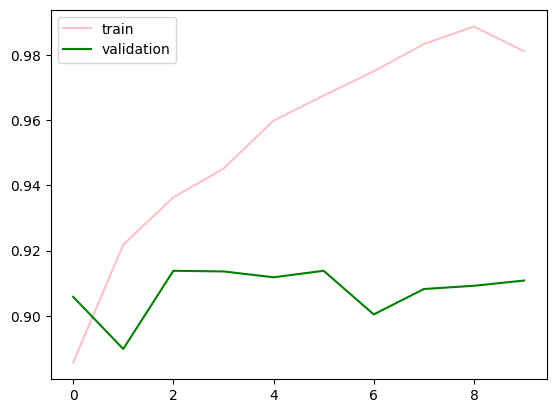

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'pink', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'validation')
plt.legend()
plt.show()

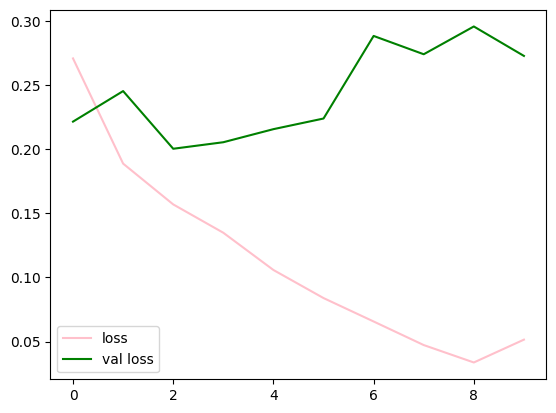

In [19]:

plt.plot(history.history['loss'], color = 'pink', label = 'loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend()
plt.show()

-----------------------
------------------
-----------------
--------------------
DATA AUGMENTATION ----------------------------




In [20]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'

)